In [26]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [27]:
toCompute=True

In [28]:
classifier_name="RF"

# Import dataset

In [29]:
dataset_name, dataset_filename="groups_10_discrete", "groups_10_dataset_discretized"
results_output="results_k_heuristic"

In [30]:
outputDirResults=f"./{results_output}/{dataset_name}/{classifier_name}/"
saveResults=False

if saveResults:
    from src.utils import saveJson
    from pathlib import Path
    Path(outputDirResults).mkdir(parents=True, exist_ok=True)

In [31]:
import pandas as pd
df=pd.read_csv(f"./datasets/{dataset_filename}.csv")
df.head()

,X,Y,R1,R2,R3,R4,R5,R6,R7,R8,class
0,(0.333-0.666),(0.333-0.666),≥0.666,(0.333-0.666),(0.333-0.666),≥0.666,(0.333-0.666),≤0.333,(0.333-0.666),≤0.333,2
1,(0.333-0.666),≥0.666,≥0.666,(0.333-0.666),(0.333-0.666),(0.333-0.666),(0.333-0.666),≥0.666,≤0.333,≥0.666,0
2,(0.333-0.666),(0.333-0.666),≤0.333,≥0.666,(0.333-0.666),≤0.333,≥0.666,≥0.666,≤0.333,≤0.333,2
3,(0.333-0.666),≥0.666,≤0.333,≥0.666,≥0.666,(0.333-0.666),≥0.666,(0.333-0.666),≤0.333,(0.333-0.666),0
4,≤0.333,(0.333-0.666),≤0.333,(0.333-0.666),≥0.666,(0.333-0.666),(0.333-0.666),(0.333-0.666),(0.333-0.666),(0.333-0.666),1


In [32]:
from ProcessedDataset import ProcessedDataset

In [33]:
all_data=False
pc = ProcessedDataset(df)

if classifier_name=="RF":

    from sklearn.ensemble import RandomForestClassifier
    clf_init = RandomForestClassifier(random_state=42)
    
elif classifier_name=="NN":
    
    from sklearn.neural_network import MLPClassifier
    clf_init = MLPClassifier(random_state=True)
    
else:
    raise ValueError()
pc.processDataset(clf_init, all_data=all_data, dataset_name=dataset_name,  round_v=3, bins=3)

In [34]:
predicted=np.argmax(pc.predict_fn(pc.test.values), axis=1)
#FP=[i for i,p in enumerate(predicted) if p==1 and labels_test[i]==0]
#FN=[i for i,p in enumerate(predicted) if p==0 and labels_test[i]==1]
mispredicted=[i for i,p in enumerate(predicted) if p!=pc.labels_test[i]]
correct_prediction=[i for i,p in enumerate(predicted) if p==pc.labels_test[i]]

In [35]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", round(accuracy_score(pc.labels_test, predicted),4))

Accuracy:  1.0


# Explainers

## LACE

In [36]:
from src.LACE_explainer import LACE_explainer

lace_explainer = LACE_explainer(pc.d_train,pc.predict_fn, dataset_name="COMPAS")

# Compute explanation

In [37]:
outdir_lace=f"./results/{dataset_name}/lace/heuristic"

saveFig=False

if saveFig:
    from pathlib import Path
    Path(outdir_lace).mkdir(parents=True, exist_ok=True)

In [38]:
def saveFigure(fig_lace, outdir, id_i, explainer_name="", w=4,h=3):
    fig_lace.set_size_inches(w,h)
    fig_lace.savefig(f"{outdir}/{explainer_name}_{id_i}.pdf", bbox_inches="tight")

In [39]:
def numberIterations(errors):
    return len(errors)

def getFirstLastApproxError(errors):
    import operator
    error_last_iter=max(errors.items(), key=operator.itemgetter(0))[1]
    error_first_iter=min(errors.items(), key=operator.itemgetter(0))[1]
    return error_first_iter, error_last_iter

In [40]:
iterations={}
approx_errors={}



compute_lace_step k=89
Unique columns with k=89: [], 0.0
89
lev_1 - (1 rules)


,ids,body,class,sup,conf,len
0,"[1, 2]","(X=(0.333-0.666), Y=≥0.666)",0,48,100.0,2


class_prob - class_frequency = PI 0.79 0.328875 0.46112500000000006
PI_approx 0.5038650000000156
{'1,2': 0.5038650000000156}
Error 0.04274000000001549


compute_lace_step k=178
Unique columns with k=178: [], 0.0
178
lev_1 - (1 rules)


,ids,body,class,sup,conf,len
0,"[1, 2]","(X=(0.333-0.666), Y=≥0.666)",0,91,100.0,2


class_prob - class_frequency = PI 0.79 0.328875 0.46112500000000006
PI_approx 0.5038650000000156
{'1,2': 0.5038650000000156}
Error 0.04274000000001549


compute_lace_step k=267
Unique columns with k=267: [], 0.0
267
lev_1 - (1 rules)


,ids,body,class,sup,conf,len
0,"[1, 2]","(X=(0.333-0.666), Y=≥0.666)",0,117,100.0,2


class_prob - class_frequency = PI 0.79 0.328875 0.46112500000000006
PI_approx 0.5038650000000156
{'1,2': 0.5038650000000156}
Error 0.04274000000001549


compute_lace_step k=356
Unique columns with k=356: [], 0.0
356
lev_1 - (1 rules)


,ids,body,class,sup,conf,len
0,"[1, 2]","(X=(0.333-0.666), Y=≥0.666)",0,146,100.0,2


class_prob - class_frequency = PI 0.79 0.328875 0.46112500000000006
PI_approx 0.5038650000000156
{'1,2': 0.5038650000000156}
Error 0.04274000000001549


compute_lace_step k=445
Unique columns with k=445: [], 0.0
445
lev_1 - (1 rules)


,ids,body,class,sup,conf,len
0,"[1, 2]","(X=(0.333-0.666), Y=≥0.666)",0,168,100.0,2


class_prob - class_frequency = PI 0.79 0.328875 0.46112500000000006
PI_approx 0.5038650000000156
{'1,2': 0.5038650000000156}
Error 0.04274000000001549


compute_lace_step k=534
Unique columns with k=534: [], 0.0
534
lev_1 - (1 rules)


,ids,body,class,sup,conf,len
0,"[1, 2]","(X=(0.333-0.666), Y=≥0.666)",0,195,100.0,2


class_prob - class_frequency = PI 0.79 0.328875 0.46112500000000006
PI_approx 0.5038650000000156
{'1,2': 0.5038650000000156}
Error 0.04274000000001549


compute_lace_step k=623
Unique columns with k=623: [], 0.0
623
lev_1 - (1 rules)


,ids,body,class,sup,conf,len
0,"[1, 2]","(X=(0.333-0.666), Y=≥0.666)",0,223,100.0,2


class_prob - class_frequency = PI 0.79 0.328875 0.46112500000000006
PI_approx 0.5038650000000156
{'1,2': 0.5038650000000156}
Error 0.04274000000001549


compute_lace_step k=712
Unique columns with k=712: [], 0.0
712
lev_1 - (1 rules)


,ids,body,class,sup,conf,len
0,"[1, 2]","(X=(0.333-0.666), Y=≥0.666)",0,239,100.0,2


class_prob - class_frequency = PI 0.79 0.328875 0.46112500000000006
PI_approx 0.5038650000000156
{'1,2': 0.5038650000000156}
Error 0.04274000000001549


compute_lace_step k=801
Unique columns with k=801: [], 0.0
801
lev_1 - (1 rules)


,ids,body,class,sup,conf,len
0,"[1, 2]","(X=(0.333-0.666), Y=≥0.666)",0,262,100.0,2


class_prob - class_frequency = PI 0.79 0.328875 0.46112500000000006
PI_approx 0.5038650000000156
{'1,2': 0.5038650000000156}
Error 0.04274000000001549


compute_lace_step k=890
Unique columns with k=890: [], 0.0
890
lev_1 - (1 rules)


,ids,body,class,sup,conf,len
0,"[1, 2]","(X=(0.333-0.666), Y=≥0.666)",0,278,100.0,2


class_prob - class_frequency = PI 0.79 0.328875 0.46112500000000006
PI_approx 0.5038650000000156
{'1,2': 0.5038650000000156}
Error 0.04274000000001549


compute_lace_step k=979
Unique columns with k=979: [], 0.0
979
lev_1 - (1 rules)


,ids,body,class,sup,conf,len
0,"[1, 2]","(X=(0.333-0.666), Y=≥0.666)",0,296,100.0,2


class_prob - class_frequency = PI 0.79 0.328875 0.46112500000000006
PI_approx 0.5038650000000156
{'1,2': 0.5038650000000156}
Error 0.04274000000001549


compute_lace_step k=1068
Unique columns with k=1068: [], 0.0
1068
lev_1 - (1 rules)


,ids,body,class,sup,conf,len
0,"[1, 2]","(X=(0.333-0.666), Y=≥0.666)",0,315,100.0,2


class_prob - class_frequency = PI 0.79 0.328875 0.46112500000000006
PI_approx 0.5038650000000156
{'1,2': 0.5038650000000156}
Error 0.04274000000001549


compute_lace_step k=1157
Unique columns with k=1157: [], 0.0
1157
lev_1 - (1 rules)


,ids,body,class,sup,conf,len
0,"[1, 2]","(X=(0.333-0.666), Y=≥0.666)",0,337,100.0,2


class_prob - class_frequency = PI 0.79 0.328875 0.46112500000000006
PI_approx 0.5038650000000156
{'1,2': 0.5038650000000156}
Error 0.04274000000001549


compute_lace_step k=1246
Unique columns with k=1246: [], 0.0
1246
lev_1 - (1 rules)


,ids,body,class,sup,conf,len
0,"[1, 2]","(X=(0.333-0.666), Y=≥0.666)",0,358,100.0,2


class_prob - class_frequency = PI 0.79 0.328875 0.46112500000000006
PI_approx 0.5038650000000156
{'1,2': 0.5038650000000156}
Error 0.04274000000001549


compute_lace_step k=1335
Unique columns with k=1335: [], 0.0
1335
lev_1 - (1 rules)


,ids,body,class,sup,conf,len
0,"[1, 2]","(X=(0.333-0.666), Y=≥0.666)",0,379,100.0,2


class_prob - class_frequency = PI 0.79 0.328875 0.46112500000000006
PI_approx 0.5038650000000156
{'1,2': 0.5038650000000156}
Error 0.04274000000001549


compute_lace_step k=1424
Unique columns with k=1424: [], 0.0
1424
lev_1 - (1 rules)


,ids,body,class,sup,conf,len
0,"[1, 2]","(X=(0.333-0.666), Y=≥0.666)",0,398,100.0,2


class_prob - class_frequency = PI 0.79 0.328875 0.46112500000000006
PI_approx 0.5038650000000156
{'1,2': 0.5038650000000156}
Error 0.04274000000001549


compute_lace_step k=1513
Unique columns with k=1513: [], 0.0
1513
lev_1 - (1 rules)


,ids,body,class,sup,conf,len
0,"[1, 2]","(X=(0.333-0.666), Y=≥0.666)",0,418,100.0,2


class_prob - class_frequency = PI 0.79 0.328875 0.46112500000000006
PI_approx 0.5038650000000156
{'1,2': 0.5038650000000156}
Error 0.04274000000001549
{'Rule_1': (['X=(0.333-0.666)', 'Y=≥0.666'], '-->', '0')}
['X=(0.333-0.666)', 'Y=≥0.666'] --> 0 418 support: 0.2762723066754792 confidence: 100.0 [1, 2]


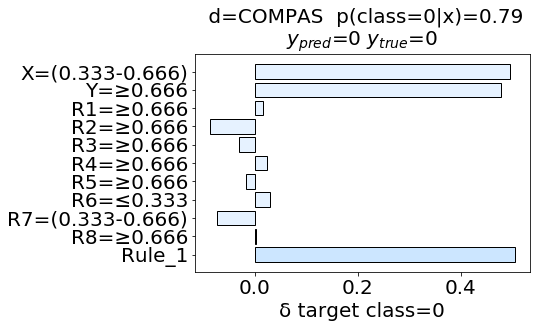

In [41]:
for id_i in [68]:
    predicted_class=pc.predict_fn_class(pc.test.iloc[id_i].values.reshape(1,-1))[0]

    featureMasking=True
    instance = pc.d_explain[id_i]
    infos = {"model": "RF"}
    instance_discretized = pc.d_explain.getDiscretizedInstance(id_i)
    explanation_fm = lace_explainer.explain_instance(
        instance,
        pc.class_names[predicted_class],
        featureMasking=featureMasking,
        discretizedInstance=instance_discretized,
        verbose=True)
    fig_lace =explanation_fm.plotExplanation(showRuleKey=False, retFig=True, fontsize=20)
    explanation_fm.local_rules.printLocalRules()
    if saveFig:
        saveFigure(fig_lace, outputDirResults, id_i, "lace")
    
    iterations[id_i]=numberIterations(explanation_fm.errors)
    approx_errors[id_i]=getFirstLastApproxError(explanation_fm.errors)

In [44]:
explanation_fm.estimateUserRule(list(range(1,4)), predicted_class)

{'1,2,3': 0.4731887500000159}

# Evaluation

In [17]:
showExplanation=False
n_explanations=100

In [18]:
iterations={}
approx_errors={}

## Heuristic

In [19]:
for id_i in range(0,n_explanations):
    print(id_i, end=" ")
    predicted_class=pc.predict_fn_class(pc.test.iloc[id_i].values.reshape(1,-1))[0]
    
    
    featureMasking=True
    instance = pc.d_explain[id_i]
    infos = {"model": classifier_name}
    instance_discretized = pc.d_explain.getDiscretizedInstance(id_i)
    explanation_fm = lace_explainer.explain_instance(
        instance,
        pc.class_names[predicted_class],
        featureMasking=featureMasking,
        discretizedInstance=instance_discretized,
        verbose=False)
    if showExplanation:
        fig_lace =explanation_fm.plotExplanation(showRuleKey=False, retFig=True)
        #explanation_fm.local_rules.printLocalRules()
        if saveFig:
            saveFigure(fig_lace, outdir_lace, id_i, "lace")
        changes=explanation_fm.estimateSingleAttributeChangePrediction()
        if changes:
            print(changes)
    iterations[id_i]=numberIterations(explanation_fm.errors)
    approx_errors[id_i]=getFirstLastApproxError(explanation_fm.errors)
    
print()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 


### Heuristic recap

In [23]:
from statistics import mean, stdev
print(iterations)
n_iterations=list(iterations.values())

stats_iterations={"min":min(n_iterations), "max":max(n_iterations), "mean":mean(n_iterations), "stdev":stdev(n_iterations)}
print(stats_iterations)
if saveResults:
    saveJson(stats_iterations, "stats_iterations", outputDirResults)

{0: 6, 1: 7, 2: 6, 3: 7, 4: 6, 5: 6, 6: 6, 7: 6, 8: 6, 9: 6, 10: 6, 11: 6, 12: 6, 13: 6, 14: 6, 15: 6, 16: 6, 17: 6, 18: 7, 19: 6, 20: 6, 21: 6, 22: 6, 23: 6, 24: 6, 25: 6, 26: 6, 27: 6, 28: 6, 29: 6, 30: 6, 31: 6, 32: 6, 33: 6, 34: 6, 35: 6, 36: 6, 37: 6, 38: 7, 39: 6, 40: 6, 41: 6, 42: 6, 43: 7, 44: 6, 45: 6, 46: 6, 47: 7, 48: 6, 49: 6, 50: 6, 51: 7, 52: 6, 53: 6, 54: 6, 55: 6, 56: 7, 57: 6, 58: 6, 59: 6, 60: 6, 61: 6, 62: 7, 63: 7, 64: 6, 65: 6, 66: 6, 67: 6, 68: 6, 69: 6, 70: 6, 71: 6, 72: 6, 73: 6, 74: 6, 75: 6, 76: 6, 77: 7, 78: 7, 79: 7, 80: 6, 81: 6, 82: 6, 83: 6, 84: 6, 85: 6, 86: 6, 87: 6, 88: 7, 89: 6, 90: 6, 91: 6, 92: 6, 93: 6, 94: 6, 95: 7, 96: 6, 97: 6, 98: 7, 99: 7}
{'min': 6, 'max': 7, 'mean': 6.17, 'stdev': 0.3775251680686369}


In [24]:
print(approx_errors)
if saveResults:
    saveJson(approx_errors, "approx_errors", outputDirResults)

{0: (1, 0.0), 1: (1, 0.0), 2: (1, 0.0), 3: (1, 0.0), 4: (1, 0.0), 5: (1, 0.0), 6: (1, 0.0), 7: (1, 0.0), 8: (1, 0.0), 9: (1, 0.0), 10: (1, 0.0), 11: (1, 0.0), 12: (1, 0.0), 13: (1, 0.0), 14: (1, 0.0), 15: (1, 0.0), 16: (1, 0.0), 17: (1, 0.0), 18: (1, 0.0), 19: (1, 0.0), 20: (1, 0.0), 21: (1, 0.0), 22: (1, 0.0), 23: (1, 0.0), 24: (1, 0.0), 25: (1, 0.0), 26: (1, 0.0), 27: (1, 0.0), 28: (1, 0.0), 29: (1, 0.0), 30: (1, 0.0), 31: (1, 0.0), 32: (1, 0.0), 33: (1, 0.0), 34: (1, 0.0), 35: (1, 0.0), 36: (1, 0.0), 37: (1, 0.0), 38: (1, 0.0), 39: (1, 0.0), 40: (1, 0.0), 41: (1, 0.0), 42: (1, 0.0), 43: (1, 0.0), 44: (1, 0.0), 45: (1, 0.0), 46: (1, 0.0), 47: (1, 0.0), 48: (1, 0.0), 49: (1, 0.0), 50: (1, 0.0), 51: (1, 0.0), 52: (1, 0.0), 53: (1, 0.0), 54: (1, 0.0), 55: (1, 0.0), 56: (1, 0.0), 57: (1, 0.0), 58: (1, 0.0), 59: (1, 0.0), 60: (1, 0.0), 61: (1, 0.0), 62: (1, 0.0), 63: (1, 0.0), 64: (1, 0.0), 65: (1, 0.0), 66: (1, 0.0), 67: (1, 0.0), 68: (1, 0.0), 69: (1, 0.0), 70: (1, 0.0), 71: (1, 0.0), 7

In [25]:
approx_errors_v=list(approx_errors.values())
from statistics import mean, stdev
delta_approx=[v[0]-v[1] for v in approx_errors_v]

stats_approx_error={"min":min(delta_approx), "max":max(delta_approx), "mean":mean(delta_approx), "stdev":stdev(delta_approx)}

print(stats_approx_error)
if saveResults:
    saveJson(stats_approx_error, "stats_approx_error", outputDirResults)

{'min': 1.0, 'max': 1.0, 'mean': 1.0, 'stdev': 0.0}
